
Imbalance ratio: 0.50 (positive class: 50.0%)


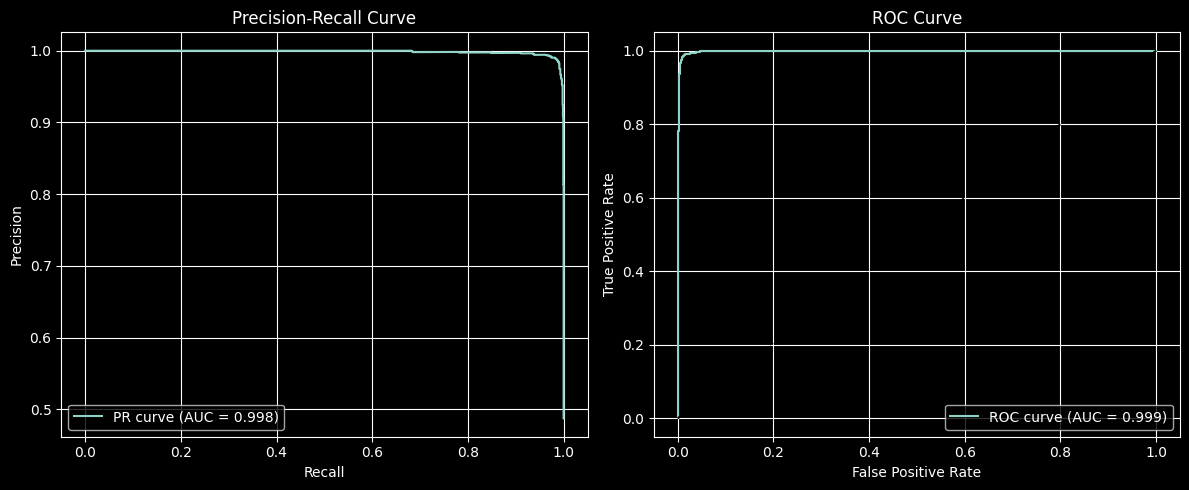


Imbalance ratio: 0.90 (positive class: 10.0%)


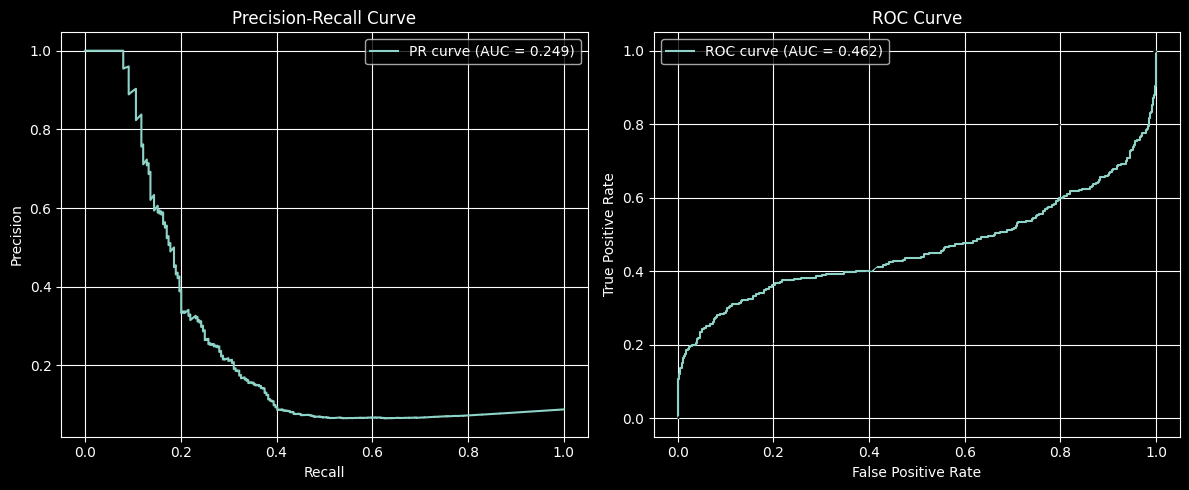


Imbalance ratio: 0.99 (positive class: 1.0%)


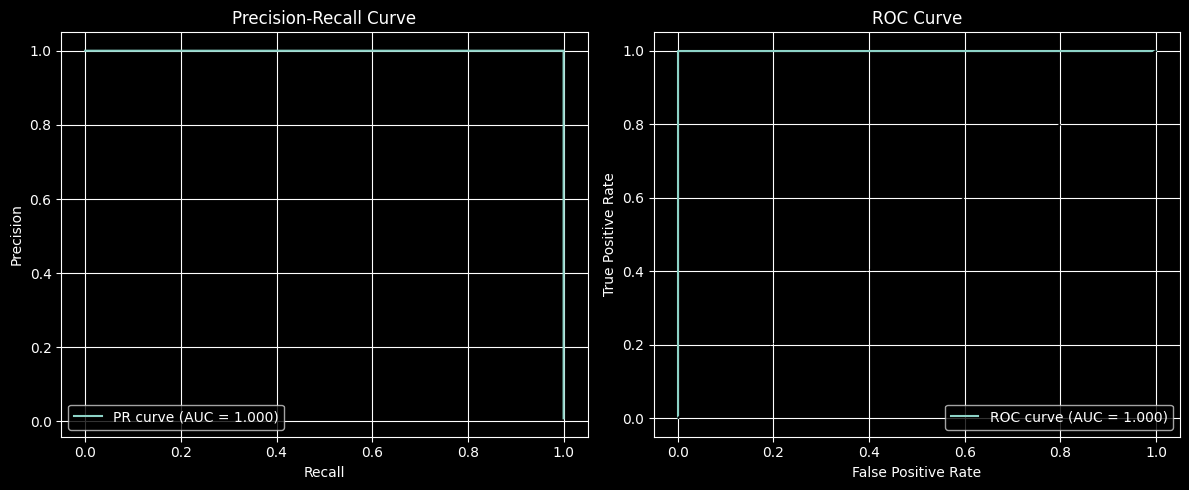

In [2]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def create_imbalanced_dataset(n_samples=10000, imbalance_ratio=0.95):
    """Create an imbalanced dataset with specified ratio"""
    n_samples_minority = int(n_samples * (1 - imbalance_ratio))
    n_samples_majority = n_samples - n_samples_minority
    
    # Create majority class samples
    X_maj, y_maj = make_classification(
        n_samples=n_samples_majority, n_features=2, n_redundant=0,
        n_classes=1, n_clusters_per_class=1, random_state=42
    )
    
    # Create minority class samples
    X_min, y_min = make_classification(
        n_samples=n_samples_minority, n_features=2, n_redundant=0,
        n_classes=1, n_clusters_per_class=1, random_state=43
    )
    
    # Combine datasets
    X = np.vstack([X_maj, X_min])
    y = np.hstack([np.zeros(n_samples_majority), np.ones(n_samples_minority)])
    
    return X, y

def plot_curves(y_true, y_pred_proba):
    """Plot both PR and ROC curves"""
    # Calculate PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot PR curve
    ax1.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.3f})')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('Precision-Recall Curve')
    ax1.grid(True)
    ax1.legend()
    
    # Plot ROC curve
    ax2.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax2.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    return pr_auc, roc_auc

# Create and analyze datasets with different class imbalances
def analyze_imbalance_impact():
    imbalance_ratios = [0.5, 0.9, 0.99]
    results = []
    
    for ratio in imbalance_ratios:
        # Create dataset
        X, y = create_imbalanced_dataset(n_samples=10000, imbalance_ratio=ratio)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Train model
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Plot curves and get AUC scores
        print(f"\nImbalance ratio: {ratio:.2f} (positive class: {(1-ratio)*100:.1f}%)")
        pr_auc, roc_auc = plot_curves(y_test, y_pred_proba)
        results.append((ratio, pr_auc, roc_auc))
        plt.show()
    
    return results

# Run analysis
results = analyze_imbalance_impact()